<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
<h1><b> 1. IN THIS PROJECT WE ARE GOING TO PREDICT CAR PRICES.</b></h1>

In [8]:
# Importing the required libraries

# for data preprocessing and working with csv
import pandas as pd

# for linear algebra
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# for linear regression analysis
from sklearn.linear_model import LinearRegression

# for data splitting
from sklearn.model_selection import train_test_split
# for model validation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# for transforming data
from sklearn.preprocessing import LabelEncoder

<style>
h3{color: rgb(230, 230, 0)}
</style>
<h3>Creating <i>"car"</i> DataFrame to build our model</h3>

In [11]:
# There is a "index" column in the Automobile.csv raw data set. 
# We select that as our default index. 
car = pd.read_csv('..\Data\Automobile.csv', index_col='index')

In [12]:
# Printing 1st 5 rows
car.head()

Unnamed: 0      company   body-style  wheel-base  length engine-type  \
index                                                                         
0               0  alfa-romero  convertible        88.6   168.8        dohc   
1               1  alfa-romero  convertible        88.6   168.8        dohc   
2               2  alfa-romero    hatchback        94.5   171.2        ohcv   
3               3         audi        sedan        99.8   176.6         ohc   
4               4         audi        sedan        99.4   176.6         ohc   

      num-of-cylinders  horsepower  average-mileage    price  
index                                                         
0                 four         111               21  13495.0  
1                 four         111               21  16500.0  
2                  six         154               19  16500.0  
3                 four         102               24  13950.0  
4                 five         115               18  17450.0

In [13]:
car.columns

Index(['Unnamed: 0', 'company', 'body-style', 'wheel-base', 'length',
       'engine-type', 'num-of-cylinders', 'horsepower', 'average-mileage',
       'price'],
      dtype='object')

In [14]:
# Dropping 'Unnamed: 0' column
car.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
# Unnamed : 0 column has been removed
car.columns

Index(['company', 'body-style', 'wheel-base', 'length', 'engine-type',
       'num-of-cylinders', 'horsepower', 'average-mileage', 'price'],
      dtype='object')

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>Summary of our Data Frame</b> ##

In [16]:
# Overview of the Data Frame
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


Our DataFrame contains missing values.

In [19]:
# Column wise total null values
car.isnull().sum().to_frame().rename(columns={0:"Number of Missing Values"})

Number of Missing Values
company                                  0
body-style                               0
wheel-base                               0
length                                   0
engine-type                              0
num-of-cylinders                         0
horsepower                               0
average-mileage                          0
price                                    3

<style>
h3{color: rgb(117, 163, 163)}
</style>
### Checking if there is <u>"Duplicate"</u> values in our data frame.. ###

In [20]:
car[car.duplicated]

company body-style  wheel-base  length engine-type num-of-cylinders  \
index                                                                       
32      isuzu      sedan        94.5   155.9         ohc             four   

       horsepower  average-mileage  price  
index                                      
32             70               38    NaN

<style>
h3{color: rgb(117, 163, 163)}
</style>
### Creating a Data Frame to Store Null vaues ###

In [21]:
# Missing or null values in "Price" column stored into a variable.
car_null_values = car[car['price'].isnull()]

In [22]:
# PRINTING NULL VALUES
car_null_values

company body-style  wheel-base  length engine-type num-of-cylinders  \
index                                                                        
31       isuzu      sedan        94.5   155.9         ohc             four   
32       isuzu      sedan        94.5   155.9         ohc             four   
63     porsche  hatchback        98.4   175.7       dohcv            eight   

       horsepower  average-mileage  price  
index                                      
31             70               38    NaN  
32             70               38    NaN  
63            288               17    NaN

<style>
h2{color: rgb(255, 51, 0)}
</style>
## <b>Removing <i>"null"</i> Values</b> ##

In [23]:
car.dropna(inplace=True)

In [25]:
# There are no null values now
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     object 
 1   body-style        58 non-null     object 
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     object 
 5   num-of-cylinders  58 non-null     object 
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.5+ KB


<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>Checking <i>"car"</i> values</b> ##

<style>
h3{color: rgb(117, 163, 163)}
</style>
### Checking <u>Categorical</u> Values ###

In [26]:
# Totatal Data Frame object values 1st 5 rows
car.select_dtypes(['object']).head()

company   body-style engine-type num-of-cylinders
index                                                       
0      alfa-romero  convertible        dohc             four
1      alfa-romero  convertible        dohc             four
2      alfa-romero    hatchback        ohcv              six
3             audi        sedan         ohc             four
4             audi        sedan         ohc             five

<style>
h3{color: rgb(117, 163, 163)}
</style>
### Checking <b>"int"</b> and <b>"float"</b> values ###

In [28]:
# Total Data Frame int values 1st 5 rows
car.select_dtypes(['int']).head()

horsepower  average-mileage
index                             
0             111               21
1             111               21
2             154               19
3             102               24
4             115               18

In [29]:
# Totatal Data Frame float values 1st 5 rows
car.select_dtypes(['float']).head()

wheel-base  length    price
index                             
0            88.6   168.8  13495.0
1            88.6   168.8  16500.0
2            94.5   171.2  16500.0
3            99.8   176.6  13950.0
4            99.4   176.6  17450.0

<style>
h3{color: rgb(0, 153, 51)}
</style>
### All Categorical Unique Values ###

In [31]:
# To print all the unique values
car_columns = car.select_dtypes(['object']).columns
for col in car_columns:
    print(car[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>Checking column wise how many <i>Categorical</i> values are in the Data Set</b> ##

In [32]:
# Printing Columns of Categorical values
car_columns

Index(['company', 'body-style', 'engine-type', 'num-of-cylinders'], dtype='object')

<style>
h2{color: rgb(0, 163, 204)}
</style>
## Ploting chategorical values to understand and visualize data ##

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### <b>Company Chategorical total values</b> ###

In [33]:
car['company'].value_counts()

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
jaguar           3
dodge            2
porsche          2
volvo            2
isuzu            1
Name: company, dtype: int64

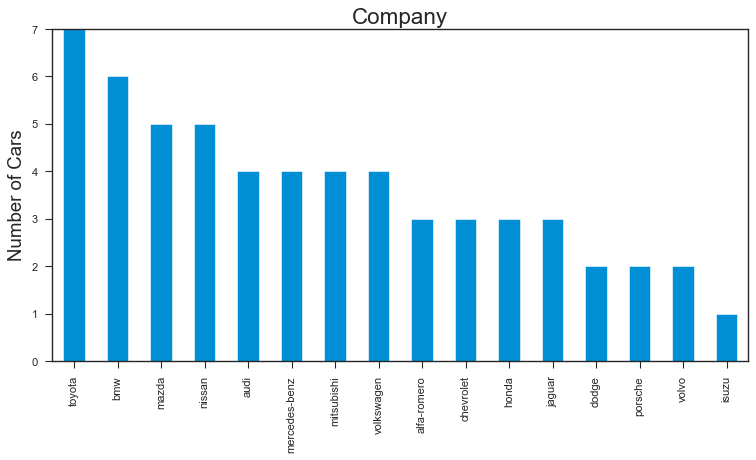

In [696]:
# Visualize Company column data

plt.figure(figsize=(10, 5))
plt.style.use('seaborn-v0_8-ticks')
car['company'].value_counts().plot(kind='bar')
plt.title('Company')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### Body Style Chategorical total values ###

In [697]:
car['body-style'].value_counts()

body-style
sedan          30
hatchback      14
wagon           9
convertible     3
hardtop         2
Name: count, dtype: int64

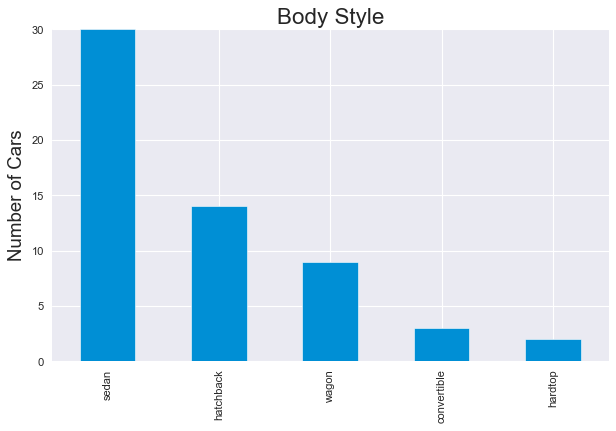

In [698]:
# Visualize Body Style column data

plt.figure(figsize=(8, 5))
plt.style.use('seaborn-v0_8-darkgrid')
car['body-style'].value_counts().plot(kind='bar')
plt.title('Body Style')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### Engine Type Chategorical total values ###

In [699]:
car['engine-type'].value_counts()

engine-type
ohc      44
dohc      5
ohcv      5
ohcf      2
l         1
rotor     1
Name: count, dtype: int64

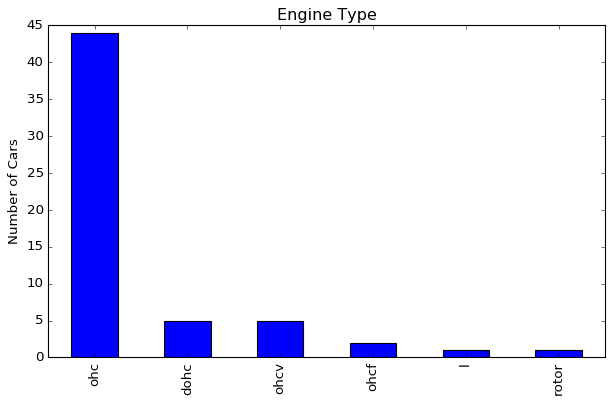

In [700]:
# Visualize Engine Type column data

plt.figure(figsize=(8, 5))
plt.style.use('classic')
car['engine-type'].value_counts().plot(kind='bar')
plt.title('Engine Type')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### Number of Cylinders Chategorical total values ###

In [701]:
car['num-of-cylinders'].value_counts()

num-of-cylinders
four      37
six       11
five       5
eight      2
three      1
twelve     1
two        1
Name: count, dtype: int64

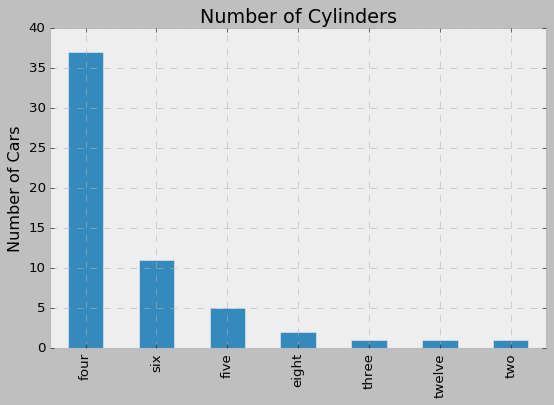

In [702]:
# Visualize Number of Cylinders Type column data

plt.figure(figsize=(8, 5))
plt.style.use('bmh')
car['num-of-cylinders'].value_counts().plot(kind='bar')
plt.title('Number of Cylinders')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b>Checking Numeric Columns Values<b> ##

In [703]:
car.describe()

wheel-base      length  horsepower  average-mileage         price
count   58.000000   58.000000   58.000000        58.000000     58.000000
mean    98.620690  173.646552  106.051724        25.534483  15387.000000
std      6.810589   14.005616   48.915402         7.932203  11320.259841
min     88.400000  141.100000   48.000000        13.000000   5151.000000
25%     94.500000  165.300000   68.000000        19.000000   6808.500000
50%     96.400000  171.450000  100.000000        24.500000  11095.000000
75%    101.800000  182.775000  122.500000        31.000000  18120.500000
max    120.900000  208.100000  262.000000        47.000000  45400.000000

<style>
h3{color: rgb(117, 163, 163)}
</style>
### Ploting Numeric Values to Visualize Data ###

<Figure size 960x1200 with 0 Axes>

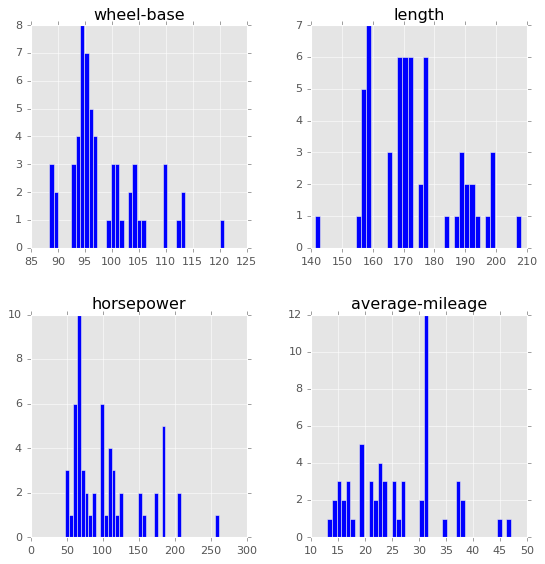

In [704]:
plt.figure(figsize=(12, 15))
plt.style.use('ggplot')
car[['wheel-base', 'length', 'horsepower', 'average-mileage']].hist(bins=40, figsize=(8,8), color='b')
plt.show()

<style>
h1{color: rgb(255, 204, 0); background-color: rgb(102, 102, 153);}
</style>
<h1><b> Comparing columns with price. Because our target varible will be <i>"Price"</i></b></h1>

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Wheel Base</b> and <b>Company</b> ##

<Figure size 640x800 with 0 Axes>

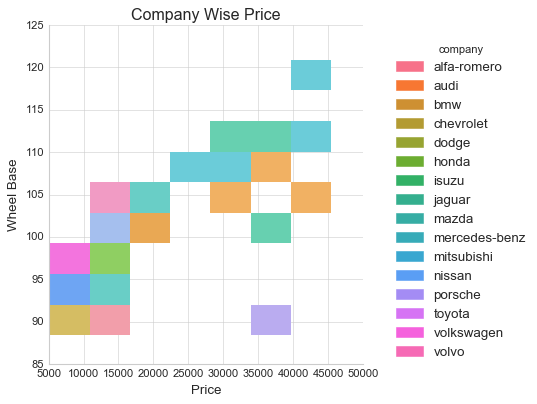

In [705]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='wheel-base', hue='company', legend=True, data=car)
plt.title('Company Wise Price')
plt.xlabel('Price')
plt.ylabel('Wheel Base')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Body Style</b> and <b>Lenght</b> ##

<Figure size 640x800 with 0 Axes>

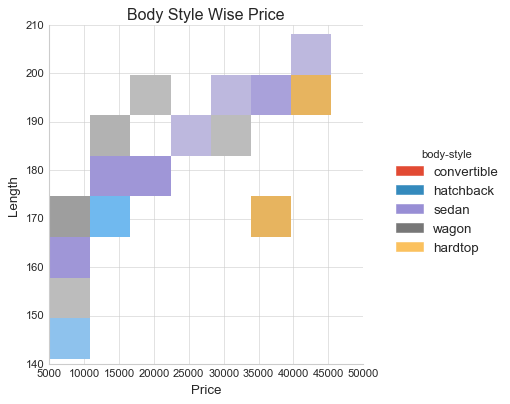

In [706]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='length', hue='body-style', legend=True, data=car)
plt.title('Body Style Wise Price')
plt.xlabel('Price')
plt.ylabel('Length')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Horsepower</b> and <b>Number Of Cylinders</b> ##

<Figure size 640x800 with 0 Axes>

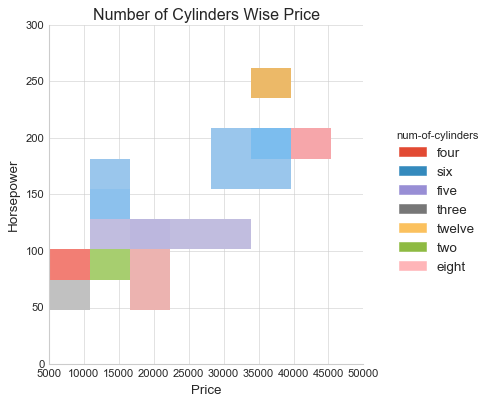

In [707]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='horsepower', hue='num-of-cylinders', legend=True, data=car)
plt.title('Number of Cylinders Wise Price')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Average Milage</b> and <b>Engine Type</b> ##

<Figure size 640x800 with 0 Axes>

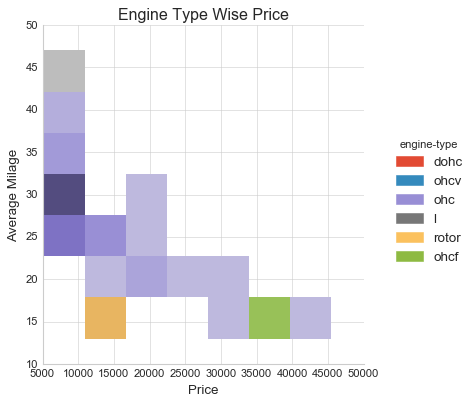

In [708]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='price', y='average-mileage', hue='engine-type', legend=True, data=car)
plt.title('Engine Type Wise Price')
plt.xlabel('Price')
plt.ylabel('Average Milage')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Sorting Data by <b><i>Price</i></b> :- ##

In [709]:
car_price_sort = car.sort_values(by='price')

In [710]:
# Printing Sorted Data
car_price_sort.head()

company body-style  wheel-base  length engine-type num-of-cylinders   
index                                                                           
16      chevrolet  hatchback        88.4   141.1           l            three  \
36          mazda  hatchback        93.1   159.1         ohc             four   
66         toyota  hatchback        95.7   158.7         ohc             four   
49     mitsubishi  hatchback        93.7   157.3         ohc             four   
37          mazda  hatchback        93.1   159.1         ohc             four   

       horsepower  average-mileage   price  
index                                       
16             48               47  5151.0  
36             68               30  5195.0  
66             62               35  5348.0  
49             68               37  5389.0  
37             68               31  6095.0

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Company</b>  Using <i>Sorted Values</i> ##

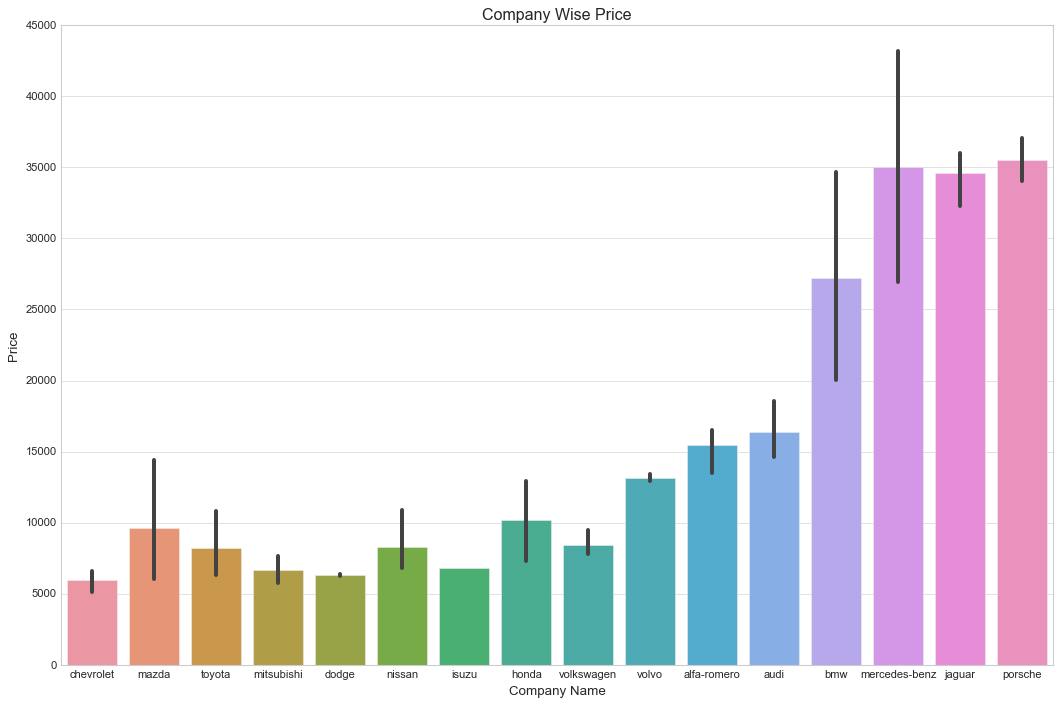

In [711]:
plt.figure(figsize=(16, 10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.barplot(x='company', y='price', data=car_price_sort)
plt.title('Company Wise Price')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Body Style</b>  Using <i>Sorted Values</i> ##

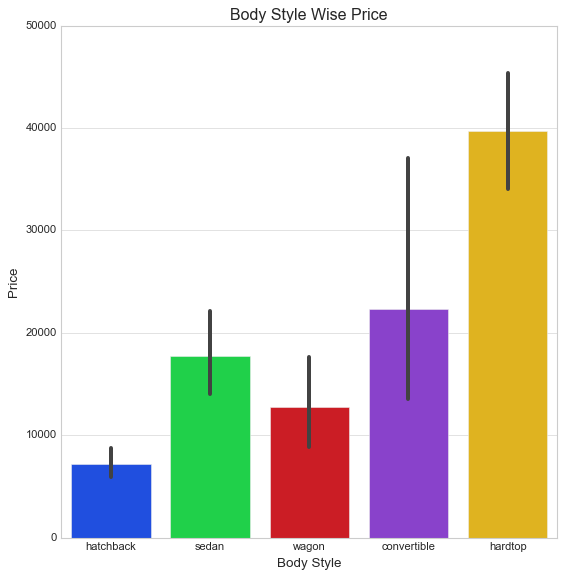

In [712]:
plt.figure(figsize=(8, 8))
plt.style.use('seaborn-v0_8-bright')
sns.barplot(x='body-style', y='price', data=car_price_sort)
plt.title('Body Style Wise Price')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Number of Cylinders</b>  Using <i>Sorted Values</i> ##

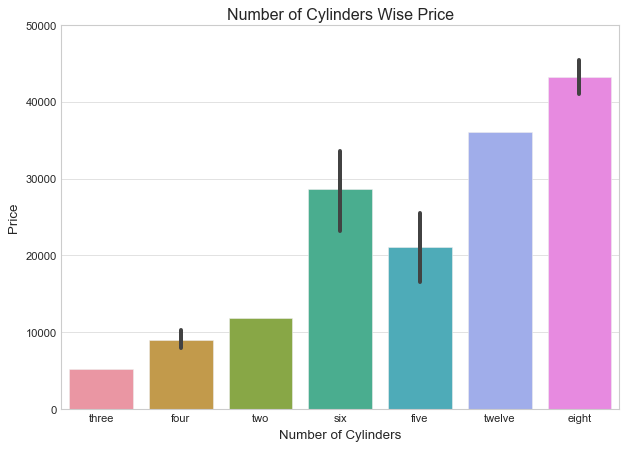

In [713]:
plt.figure(figsize=(9,6))
plt.style.use('_classic_test_patch')
sns.barplot(x='num-of-cylinders', y='price', data=car_price_sort)
plt.title('Number of Cylinders Wise Price')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.show()

<style>
h2{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
## Car <i>Price</i> vs <b>Engine Type</b>  Using <i>Sorted Values</i> ##

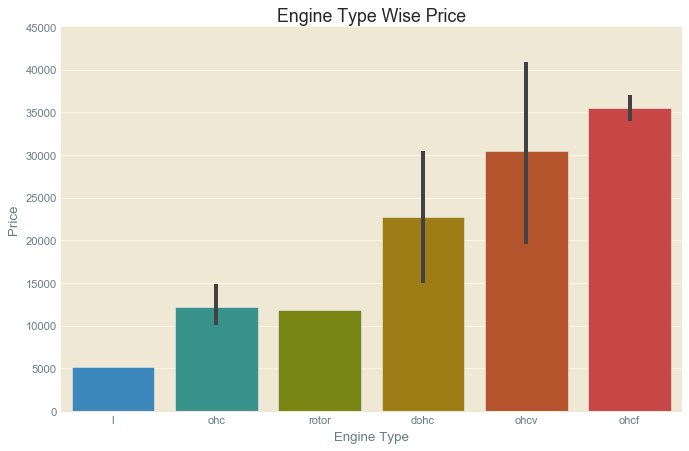

In [714]:
plt.figure(figsize=(10, 6))
plt.style.use('Solarize_Light2')
sns.barplot(x='engine-type', y='price', data=car_price_sort)
plt.title('Engine Type Wise Price')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.show()

<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
# <b>2. Machiene Learning using Linear Regression to <i>Predict</i> Car <u>"Price"</u></b> #

<style>
h3{color: rgb(51, 153, 255); background-color: rgb(255, 255, 0);}
</style>
### <b>From here we are going to use multiple model which will give us Accurecy of the program. </b> ###

<style>
h2{color: rgb(255, 102, 0)}
</style>
## 1. Changing Chategorocal Values Using <i><b>Label Encoder</b></i> ##

LabelEncoder is a technique used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b>Model 1</b> ###

In [715]:
# Copy of original Data Frame
car_mod_1 = car.copy()

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b>Label Enocder Implement</b> ###

In [716]:
car_label_replace = LabelEncoder()
car_mod_1['company'] = car_label_replace.fit_transform(car_mod_1['company'])
car_mod_1['body-style'] = car_label_replace.fit_transform(car_mod_1['body-style'])
car_mod_1['engine-type'] = car_label_replace.fit_transform(car_mod_1['engine-type'])
car_mod_1.replace({'num-of-cylinders': {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}}, inplace=True)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Verify Changes ###

In [717]:
# Veryfying Changes
car_mod_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     int32  
 1   body-style        58 non-null     int32  
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     int32  
 5   num-of-cylinders  58 non-null     int64  
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int32(3), int64(3)
memory usage: 5.9 KB


<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b> Correlation Of all Coloumns in "Model 1" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Correlation Chart </b> ###

In [718]:
car_mod_1.corr().style.background_gradient(cmap='YlGnBu')

<style>
h2{color: rgb(230, 46, 0)}
</style>
## <b>2. Conclution on Correlation data Observation </b> ##

<ol>
<li> <b> Compnay, Body Style, Engine Type </b> have mild or we can say no correlation with <i><b>Price</b></i> column. </li>
<li> <b> Wheel Base, Length, Number of Cylinders and Horsepower </b> have strong correlation with <i><b>Price</b></i> column. </li>
<li> <b> Average Mileage </b> has negative correlation with <i><b>Price</b></i> column. </li></ol>


<b> We can conclude that <i> Compnay, Body Style, Engine Type </i> remove this column from our model. </b>

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b> Verify our <i> Conclution </i> </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> HeatMap <i> "Model 1" </i> </b> ###

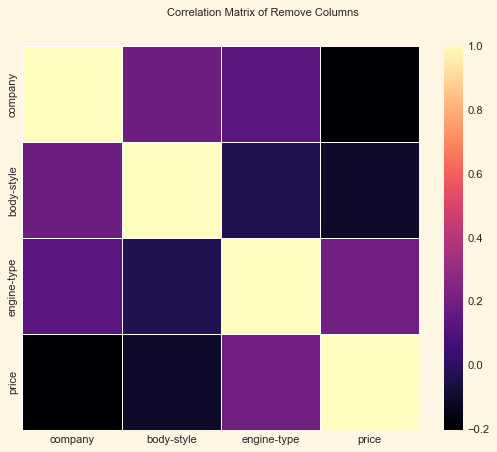

In [719]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car_mod_1[['company', 'body-style', 'engine-type', 'price']].corr(), linewidths=0.5, cmap='magma')
plt.suptitle('Correlation Matrix of Remove Columns')
plt.show()

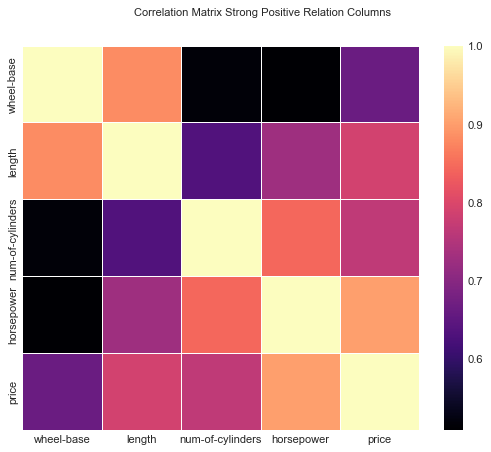

In [720]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car_mod_1[['wheel-base', 'length', 'num-of-cylinders', 'horsepower', 'price']].corr(), linewidths=0.5, cmap='magma')
plt.suptitle('Correlation Matrix Strong Positive Relation Columns')
plt.show()

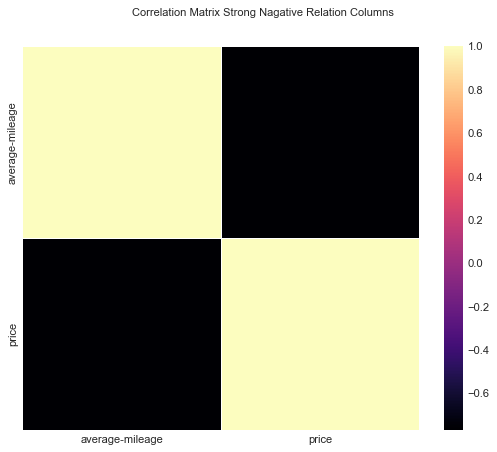

In [721]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car_mod_1[['average-mileage', 'price']].corr(), linewidths=0.5, cmap='magma')
plt.suptitle('Correlation Matrix Strong Nagative Relation Columns')
plt.show()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Pair Plot of <i> "Model 1" </i> to remove less corelated column from our "Model" </b> ###

<Figure size 1600x2000 with 0 Axes>

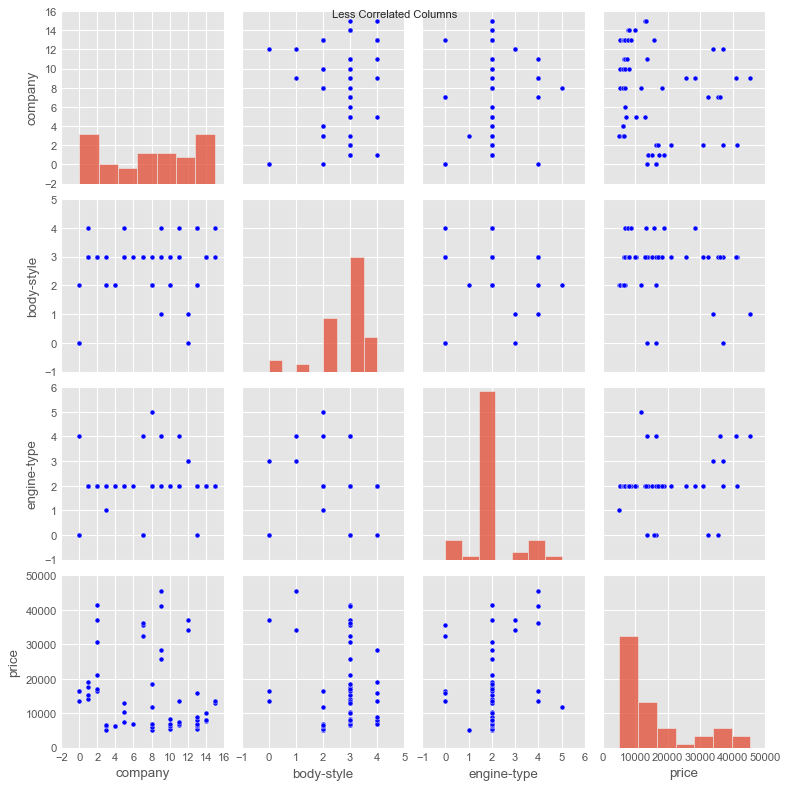

In [722]:
plt.figure(figsize=(20, 25))
plt.style.use('ggplot')
sns.pairplot(car_mod_1[['company', 'body-style', 'engine-type', 'price']], kind='scatter')
plt.suptitle('Less Correlated Columns')
plt.show()

<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>3. Machiene Learning using Linear Regression </b> ##

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Seltecting Target And Feature </b> ###

In [723]:
feature = car_mod_1.drop(['price', 'company', 'body-style', 'engine-type'],  axis=1)
target = car_mod_1['price']

In [724]:
### Printing our Feature ###
feature.head()

wheel-base  length  num-of-cylinders  horsepower  average-mileage
index                                                                   
0            88.6   168.8                 4         111               21
1            88.6   168.8                 4         111               21
2            94.5   171.2                 6         154               19
3            99.8   176.6                 4         102               24
4            99.4   176.6                 5         115               18

In [725]:
### Printing our Target ###
target.head()

index
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

Looks, Great. 

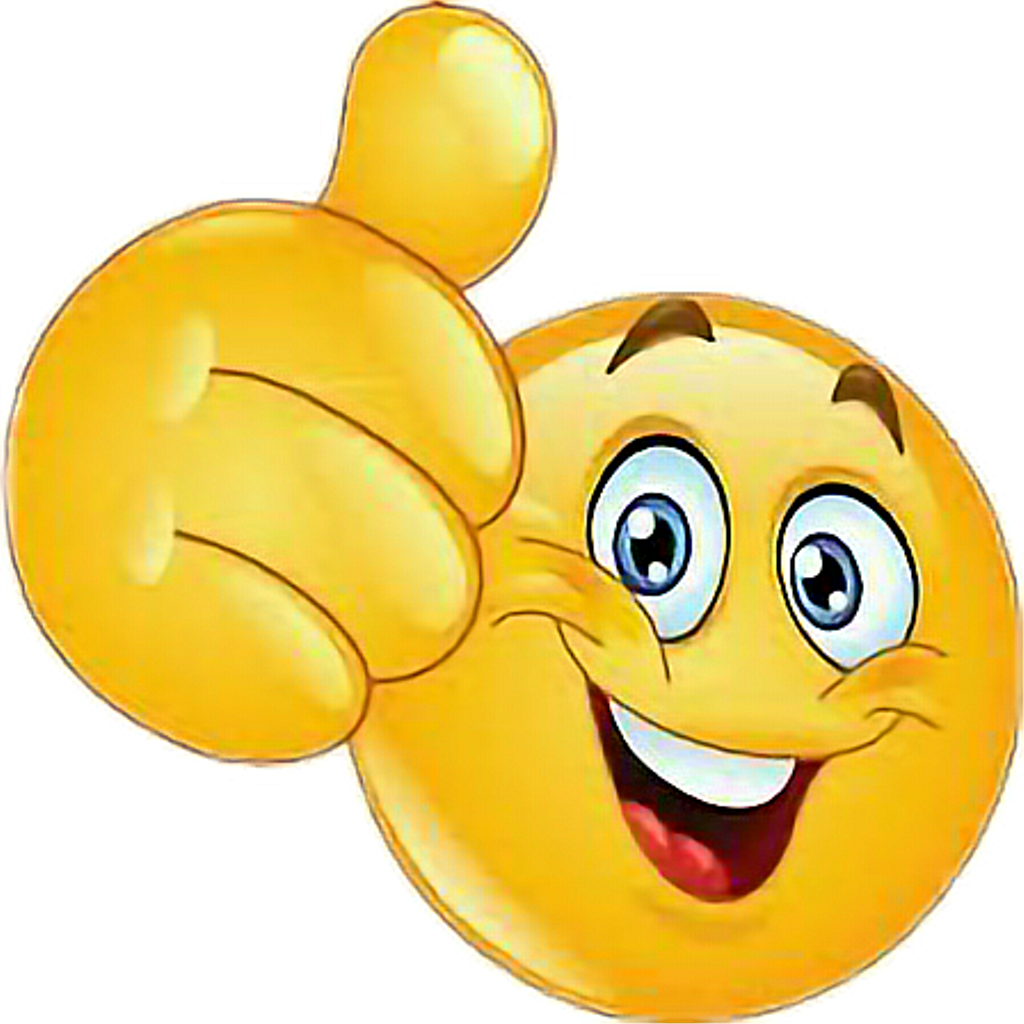

In [726]:
Image('https://www.pngkit.com/png/full/16-162327_ok-oki-emotions-ftstickers-emoji-emojistickers-yelowfac-smiley.png')

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Splitting our data to train our <i> Model </i> </b> ###

In [727]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0, shuffle=True)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking our "Train" and "Test" Data ###

In [728]:
x_train.head()

wheel-base  length  num-of-cylinders  horsepower  average-mileage
index                                                                   
43          104.9   175.0                 4          72               31
55           94.5   165.3                 4          69               31
46          120.9   208.1                 8         184               14
56           94.5   170.2                 4          69               31
52           96.3   172.4                 4          88               25

In [729]:
y_train.head()

index
43    18344.0
55     6849.0
46    40960.0
56     7349.0
52     8189.0
Name: price, dtype: float64

In [730]:
x_test.head()

wheel-base  length  num-of-cylinders  horsepower  average-mileage
index                                                                   
50           93.7   157.3                 4          68               31
49           93.7   157.3                 4          68               37
57          100.4   184.6                 6         152               19
38           93.1   159.1                 4          68               31
14          103.5   193.8                 6         182               16

In [731]:
y_test.head()

index
50     6189.0
49     5389.0
57    13499.0
38     6795.0
14    41315.0
Name: price, dtype: float64

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking our "Train" and "Test" Data columns Shape ###

In [732]:
print('Training \"x_train\" Data Shape is : ', x_train.shape)
print('Training \"y_train\" Data Shape is : ', y_train.shape)
print('Training \"x_test\" Data Shape is : ', x_test.shape)
print('Training \"y_test\" Data Shape is : ', x_test.shape)

Training "x_train" Data Shape is :  (46, 5)
Training "y_train" Data Shape is :  (46,)
Training "x_test" Data Shape is :  (12, 5)
Training "y_test" Data Shape is :  (12, 5)


<style>
h3{color: rgb(255, 153, 0)}
</style>
### Ready to Run our "Car Model 1" Model using "Train" and "Test" Data columns ###

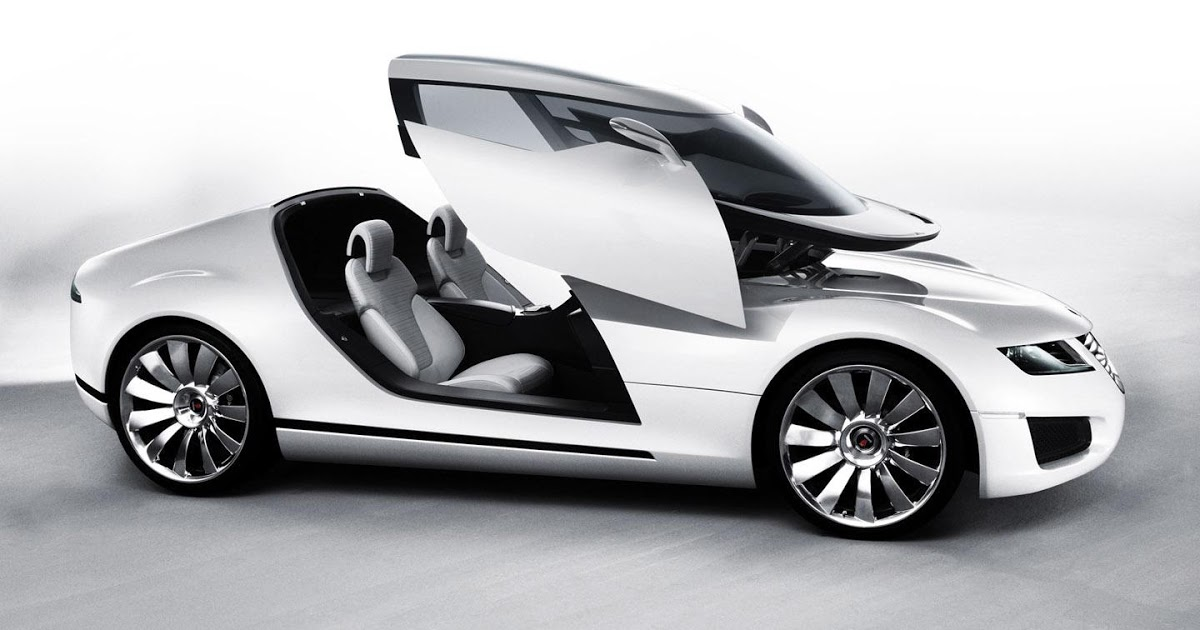

In [733]:
Image('https://th.bing.com/th/id/R.99f84f55b1fe9b8b33f918a7289a2580?rik=yHMojUiwtrSENg&riu=http%3a%2f%2f2.bp.blogspot.com%2f-GzZ15dk_hZw%2fUGtW70R41eI%2fAAAAAAAAEoE%2fXxW9GU2dHO4%2fw1200-h630-p-k-no-nu%2fwallpaper019.jpg&ehk=OmvT%2bMAiusGCaoL3AGFvPAPrjEkYtAoFarRqQXBjxsc%3d&risl=&pid=ImgRaw&r=0.jpg')

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Fitting our data to train our <i> Model </i> </b> ###

In [734]:
# Define the Model
car_model = LinearRegression()

In [735]:
# Fitting the model in Traing Data
car_model.fit(x_train, y_train) 

LinearRegression()

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Definig <i>M</i> and <i>C</i> of our <i> Model </i> </b> ###

In [736]:
m = car_model.coef_           
c = car_model.intercept_

In [737]:
# Printing m and c
print('\"M\" of the Model is : ', m)
print('\n')
print('\"C\" of the Model is : ', c)

"M" of the Model is :  [  525.53300106   -52.10501769 -1145.37258384   227.83850035
   175.83185808]


"C" of the Model is :  -50749.432585164555


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>4. Prdict Car <i> Price </i> using <u> Linear Regression </u> </b> ##

In [738]:
# Predicting Traning Data using our Linear Model 1
y_prediction_train = car_model.predict(x_train)

In [739]:
# Predicting Testing Data using our Linear Model 1
y_prediction_test = car_model.predict(x_test)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking <b> Mean Squared error </b> of our "Model" ###

In [740]:
print('Mean Squared error of our Traning Data : ', mean_squared_error(y_train, y_prediction_train))
print('Mean Squared error of our Testing Data : ', mean_squared_error(y_test, y_prediction_test))

Mean Squared error of our Traning Data :  11573414.638976349
Mean Squared error of our Testing Data :  33645599.255199075


<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking <b> Mean Absolute error </b> of our "Model" ###

In [741]:
print('Mean Absolute error of our Traning Data : ', mean_absolute_error(y_train, y_prediction_train))
print('Mean Absolute error of our Testing Data : ', mean_absolute_error(y_test, y_prediction_test))

Mean Absolute error of our Traning Data :  2595.951918766085
Mean Absolute error of our Testing Data :  3988.282068132263


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>5. Model Accurecy on Both Train and Test Data </b> ##

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Training Accurecy <b> ###

In [742]:
train_accuracy = r2_score(y_train, y_prediction_train)
print(f'The model training is accurate of {train_accuracy*100:.2f}% .')

The model training is accurate of 88.75% .


<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Testing Accurecy <b> ###

In [743]:
test_accuracy = r2_score(y_test, y_prediction_test)
print(f'The model testing is accurate of {test_accuracy*100:.2f}% .')

The model testing is accurate of 83.02% .


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>6. Verifying Model Accurecy on Both Train and Test Data </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Training Data <i>"Actual"</i> vs <i>"Predicted"</i> and "Error" chart <b>  ###

In [744]:
# Creating Actual vs Predicted Data Frame 
car_mod_1_training_chart = pd.DataFrame({'Actual': y_train.astype('int'),
                                         'Predicted' : (y_prediction_train).astype('int'),
                                         'Error' : (y_train - y_prediction_train).astype('int')})

In [745]:
# 1st Five rows of Actual vs Predicted
car_mod_1_training_chart.head().style.background_gradient(cmap='Reds')

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Testing Data <i>"Actual"</i> vs <i>"Predicted"</i> and "Error" chart <b>  ###

In [746]:
# Creating Actual vs Predicted Data Frame 
car_mod_1_testing_chart = pd.DataFrame({'Actual': y_test.astype('int'),
                                        'Predicted' : (y_prediction_test).astype('int'),
                                        'Error' : (y_test - y_prediction_test).astype('int')})

In [747]:
# Rows of Actual vs Predicted
car_mod_1_testing_chart.style.background_gradient(cmap='Greens')

<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>7. Ploting various plot to Compare "Actual" vs "Predicted" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Train Accurecy Ploting <b> ###

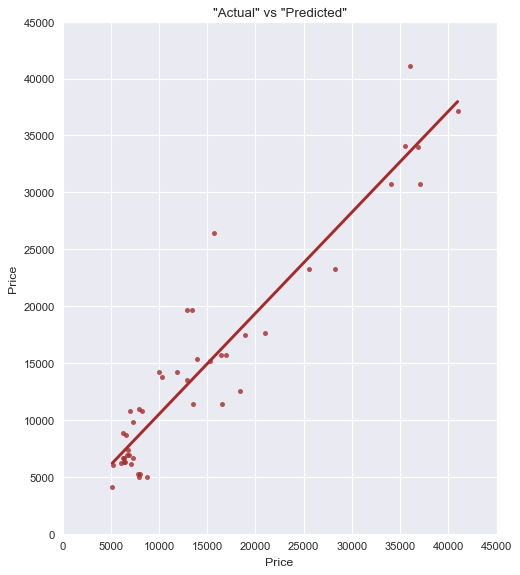

In [748]:
plt.figure(figsize=(7, 8))
plt.style.use('seaborn-v0_8')
sns.regplot(x=y_train, y=y_prediction_train, color='brown', marker='o', ci=None)
plt.title('\"Actual\" vs \"Predicted\"')
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Test Accurecy Ploting <b> ###

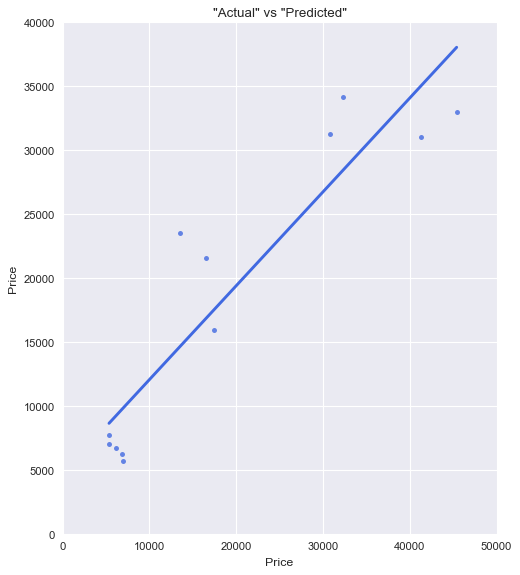

In [749]:
plt.figure(figsize=(7, 8))
plt.style.use('seaborn-v0_8')
sns.regplot(x=y_test, y=y_prediction_test, color='royalblue', marker='o', ci=None)
plt.title('\"Actual\" vs \"Predicted\"')
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Traing Data using <i>Scatterplot</i><b> ###

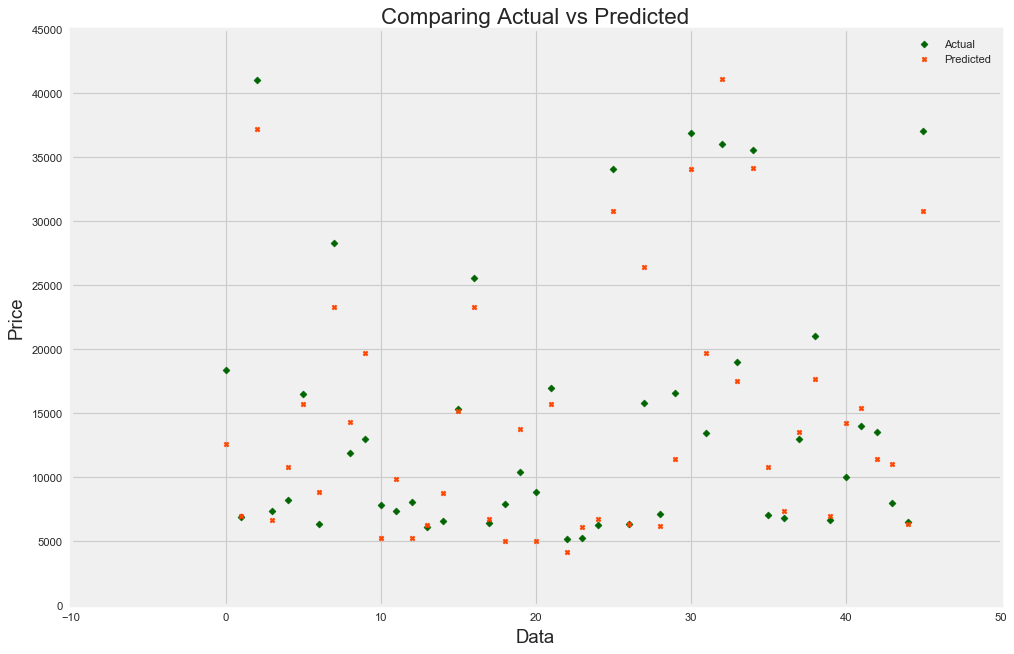

In [750]:
plt.figure(figsize=(15, 9))
plt.style.use("fivethirtyeight")
plt.scatter(x=range(46), y=y_train.iloc[:46], color='darkgreen', label='Actual', marker='D')
plt.scatter(x=range(46), y=y_prediction_train[:46], color='orangered', label='Predicted', marker='X')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Data')
plt.title('Comparing Actual vs Predicted')
plt.show()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Testing Data using <i>Scatterplot</i><b> ###

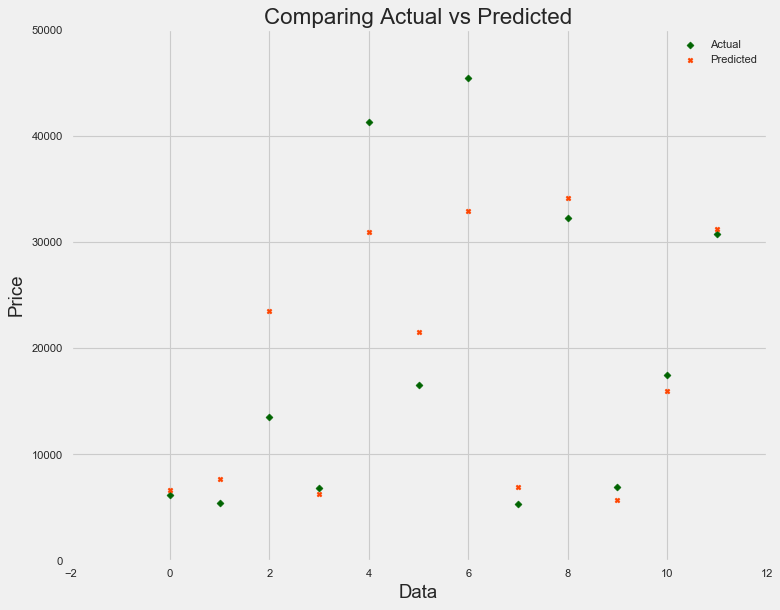

In [751]:
plt.figure(figsize=(10, 8))
plt.style.use("fivethirtyeight")
plt.scatter(x=range(12), y=y_test.iloc[:12], color='darkgreen', label='Actual', marker='D')
plt.scatter(x=range(12), y=y_prediction_test[:12], color='orangered', label='Predicted', marker='X')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Data')
plt.title('Comparing Actual vs Predicted')
plt.show()

<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>8. Visualize KDE plot to compare "Actual" vs "Predicted" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Training Data using <i>Kde</i><b> ###

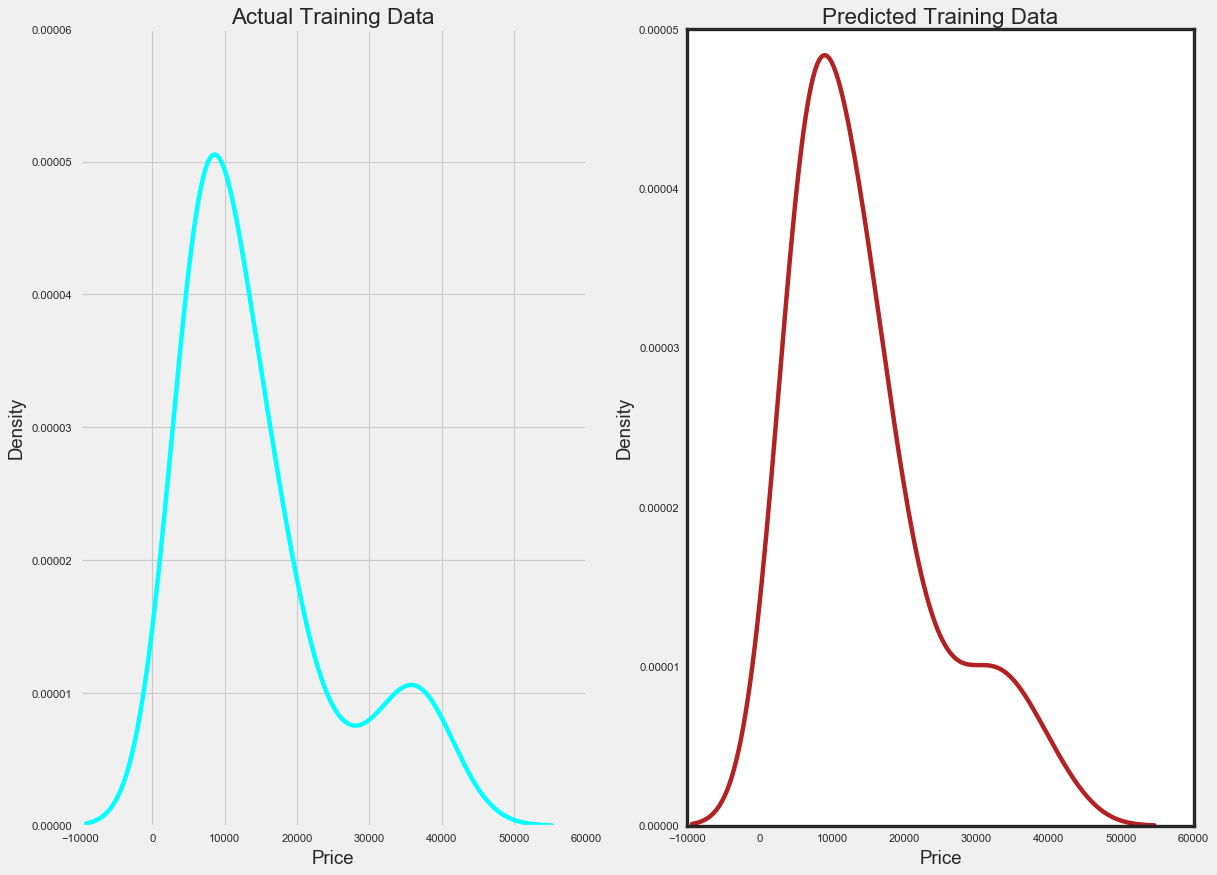

In [752]:
# Actual
plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
sns.set_style('ticks')
plt.title('Actual Training Data')
plt.xlabel('Price')
sns.kdeplot(y_train, color='aqua')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('ticks')
plt.title('Predicted Training Data')
plt.xlabel('Price')
sns.kdeplot(y_prediction_train, color='firebrick')
plt.show()

plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Testing Data using <i>Kde</i><b> ###

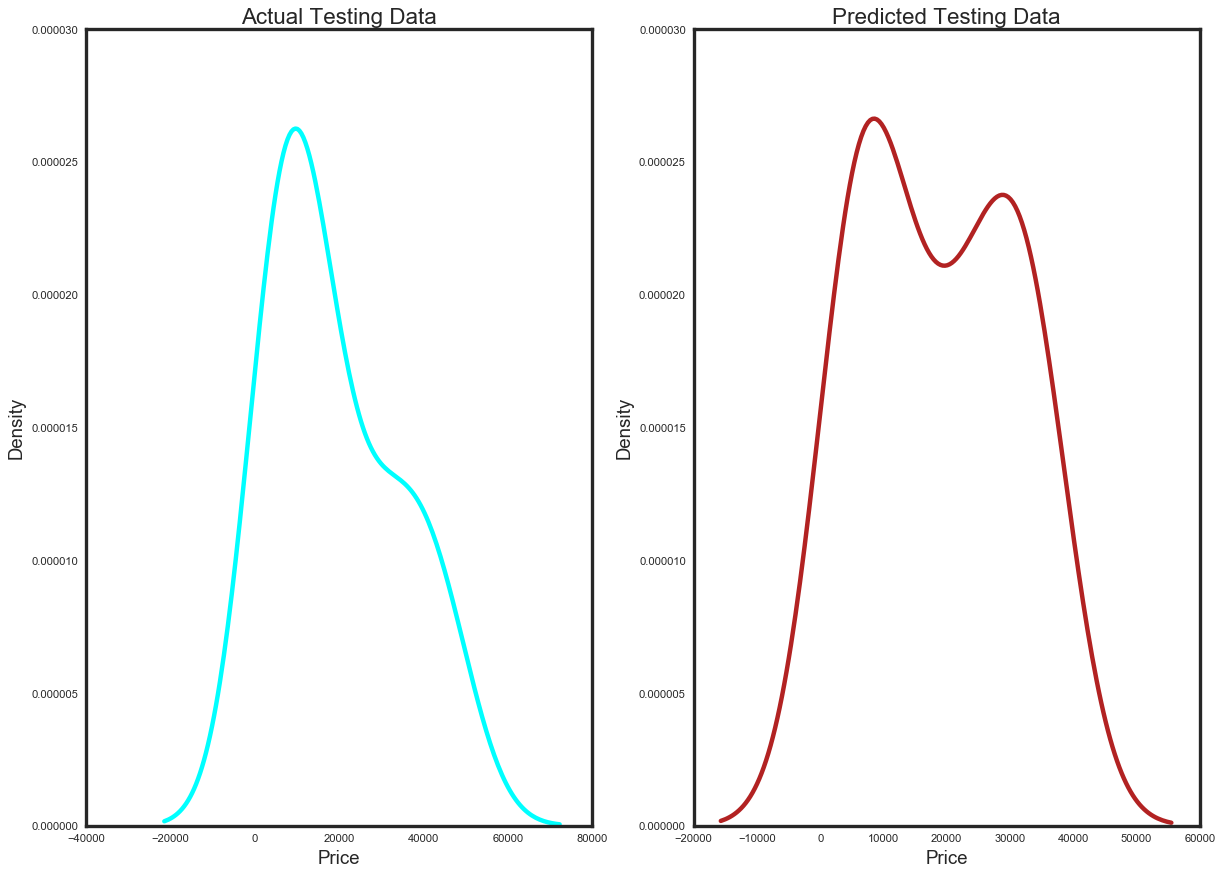

In [753]:
# Actual
plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
sns.set_style('ticks')
plt.title('Actual Testing Data')
plt.xlabel('Price')
sns.kdeplot(y_test, color='aqua')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('ticks')
plt.title('Predicted Testing Data')
plt.xlabel('Price')
sns.kdeplot(y_prediction_test, color='firebrick')
plt.show()

plt.close()

<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
<h1><b>3. Conclution of the Project on Model 1 </b></h1>

We achieved 88.75% accurecy on training and 83.02 % accurecy on testing in Model 1. We removed company body style and engine type column form our Model 1. All the charts has been displayed for a better visualiztion.

Project made by Ritam Karmakar. Submission Date 05.07.2023.

<style>
h2{color: rgb(255, 102, 0)}
</style>
## 1. Using <b>Sorted Values</b> and <i><b>Parameter Tuning</b></i> ##

Tuning parameters are used to optimize the performance of a machine learning algorithm. The most common tuning parameters are the learning rate, the number of hidden units, and the number of training iterations

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b>Model 2</b> ###

In [754]:
# Copy of original sorted by price Data Frame
car_mod_2 = car_price_sort.copy()

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b>Implementing Parameter Tuning to chnage chategorical values. </b> ###

In [755]:
car_mod_2.replace({'company': {'chevrolet':1, 'dodge':2, 'mitsubishi':3, 'isuzu':4, 
                               'toyota':5, 'nissan':6, 'volkswagen':7, 'mazda':8, 'honda':9, 
                               'volvo':10, 'alfa-romero':11, 'audi':12, 'bmw':13, 'jaguar':14, 
                               'mercedes-benz':15, 'porsche':16},
                   'engine-type': {'l':1, 'ohc':3, 'rotor':2, 'dohc':4, 'ohcv':5, 'ohcf':6},
                   'num-of-cylinders': {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},
                   'body-style': {'hatchback':1, 'wagon':2, 'sedan':3, 'convertible':4, 'hardtop':5}}, inplace=True)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Verify Changes ###

In [756]:
# Veryfying Changes
car_mod_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 16 to 47
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     int64  
 1   body-style        58 non-null     int64  
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     int64  
 5   num-of-cylinders  58 non-null     int64  
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 4.5 KB


<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b> Correlation Of all Coloumns in "Model 2" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Correlation Chart </b> ###

In [757]:
car_mod_2.corr().style.background_gradient(cmap='YlGnBu')

<style>
h2{color: rgb(230, 46, 0)}
</style>
## <b>2. Conclution on Correlation data Observation </b> ##

All the columns except Average milage has positive corealtion with price. We are going to take all the columns to predict price.

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b> Verify our <i> Conclution </i> </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> HeatMap <i> "Model 2" </i> </b> ###

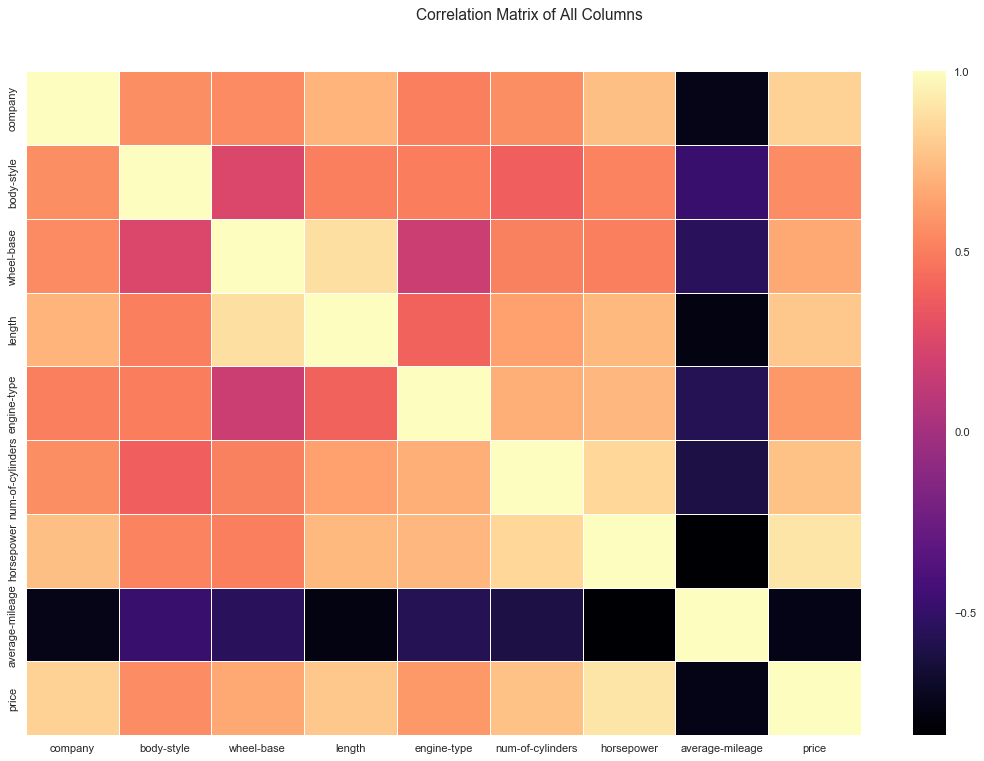

In [758]:
plt.figure(figsize=(15, 10))
sns.set_style('white')
sns.heatmap(data=car_mod_2.corr(), linewidths=0.5, cmap='magma')
plt.suptitle('Correlation Matrix of All Columns')
plt.show()

<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>3. Machiene Learning using Linear Regression </b> ##

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Seltecting Target And Feature </b> ###

In [759]:
feature = car_mod_2.drop('price',  axis=1)
target = car_mod_2['price']

In [760]:
### Printing our Feature ###
feature.head()

company  body-style  wheel-base  length  engine-type  num-of-cylinders   
index                                                                           
16           1           1        88.4   141.1            1                 3  \
36           8           1        93.1   159.1            3                 4   
66           5           1        95.7   158.7            3                 4   
49           3           1        93.7   157.3            3                 4   
37           8           1        93.1   159.1            3                 4   

       horsepower  average-mileage  
index                               
16             48               47  
36             68               30  
66             62               35  
49             68               37  
37             68               31

In [761]:
### Printing our Target ###
target.head()

index
16    5151.0
36    5195.0
66    5348.0
49    5389.0
37    6095.0
Name: price, dtype: float64

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Splitting our data to train our <i> Model </i> </b> ###

In [762]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=1, shuffle=True)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking our "Train" and "Test" Data ###

In [763]:
x_train.head()

company  body-style  wheel-base  length  engine-type  num-of-cylinders   
index                                                                           
5           12           3        99.8   177.3            3                 5  \
2           11           1        94.5   171.2            5                 6   
82           7           3        97.3   171.7            3                 4   
68           5           1        95.7   158.7            3                 4   
61          16           5        89.5   168.9            6                 6   

       horsepower  average-mileage  
index                               
5             110               19  
2             154               19  
82             52               37  
68             62               31  
61            207               17

In [764]:
y_train.head()

index
5     15250.0
2     16500.0
82     7995.0
68     6488.0
61    34028.0
Name: price, dtype: float64

In [765]:
x_test.head()

company  body-style  wheel-base  length  engine-type  num-of-cylinders   
index                                                                           
13          13           3       103.5   189.0            3                 6  \
66           5           1        95.7   158.7            3                 4   
3           12           3        99.8   176.6            3                 4   
44          15           3       110.0   190.9            3                 5   
1           11           4        88.6   168.8            4                 4   

       horsepower  average-mileage  
index                               
13            182               16  
66             62               35  
3             102               24  
44            123               22  
1             111               21

In [766]:
y_test.head()

index
13    30760.0
66     5348.0
3     13950.0
44    25552.0
1     16500.0
Name: price, dtype: float64

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking our "Train" and "Test" Data columns Shape ###

In [767]:
print('Training \"x_train\" Data Shape is : ', x_train.shape)
print('Training \"y_train\" Data Shape is : ', y_train.shape)
print('Training \"x_test\" Data Shape is : ', x_test.shape)
print('Training \"y_test\" Data Shape is : ', x_test.shape)

Training "x_train" Data Shape is :  (46, 8)
Training "y_train" Data Shape is :  (46,)
Training "x_test" Data Shape is :  (12, 8)
Training "y_test" Data Shape is :  (12, 8)


<style>
h3{color: rgb(255, 153, 0)}
</style>
### Ready to Run our "Car Model 2" Model using "Train" and "Test" Data columns ###

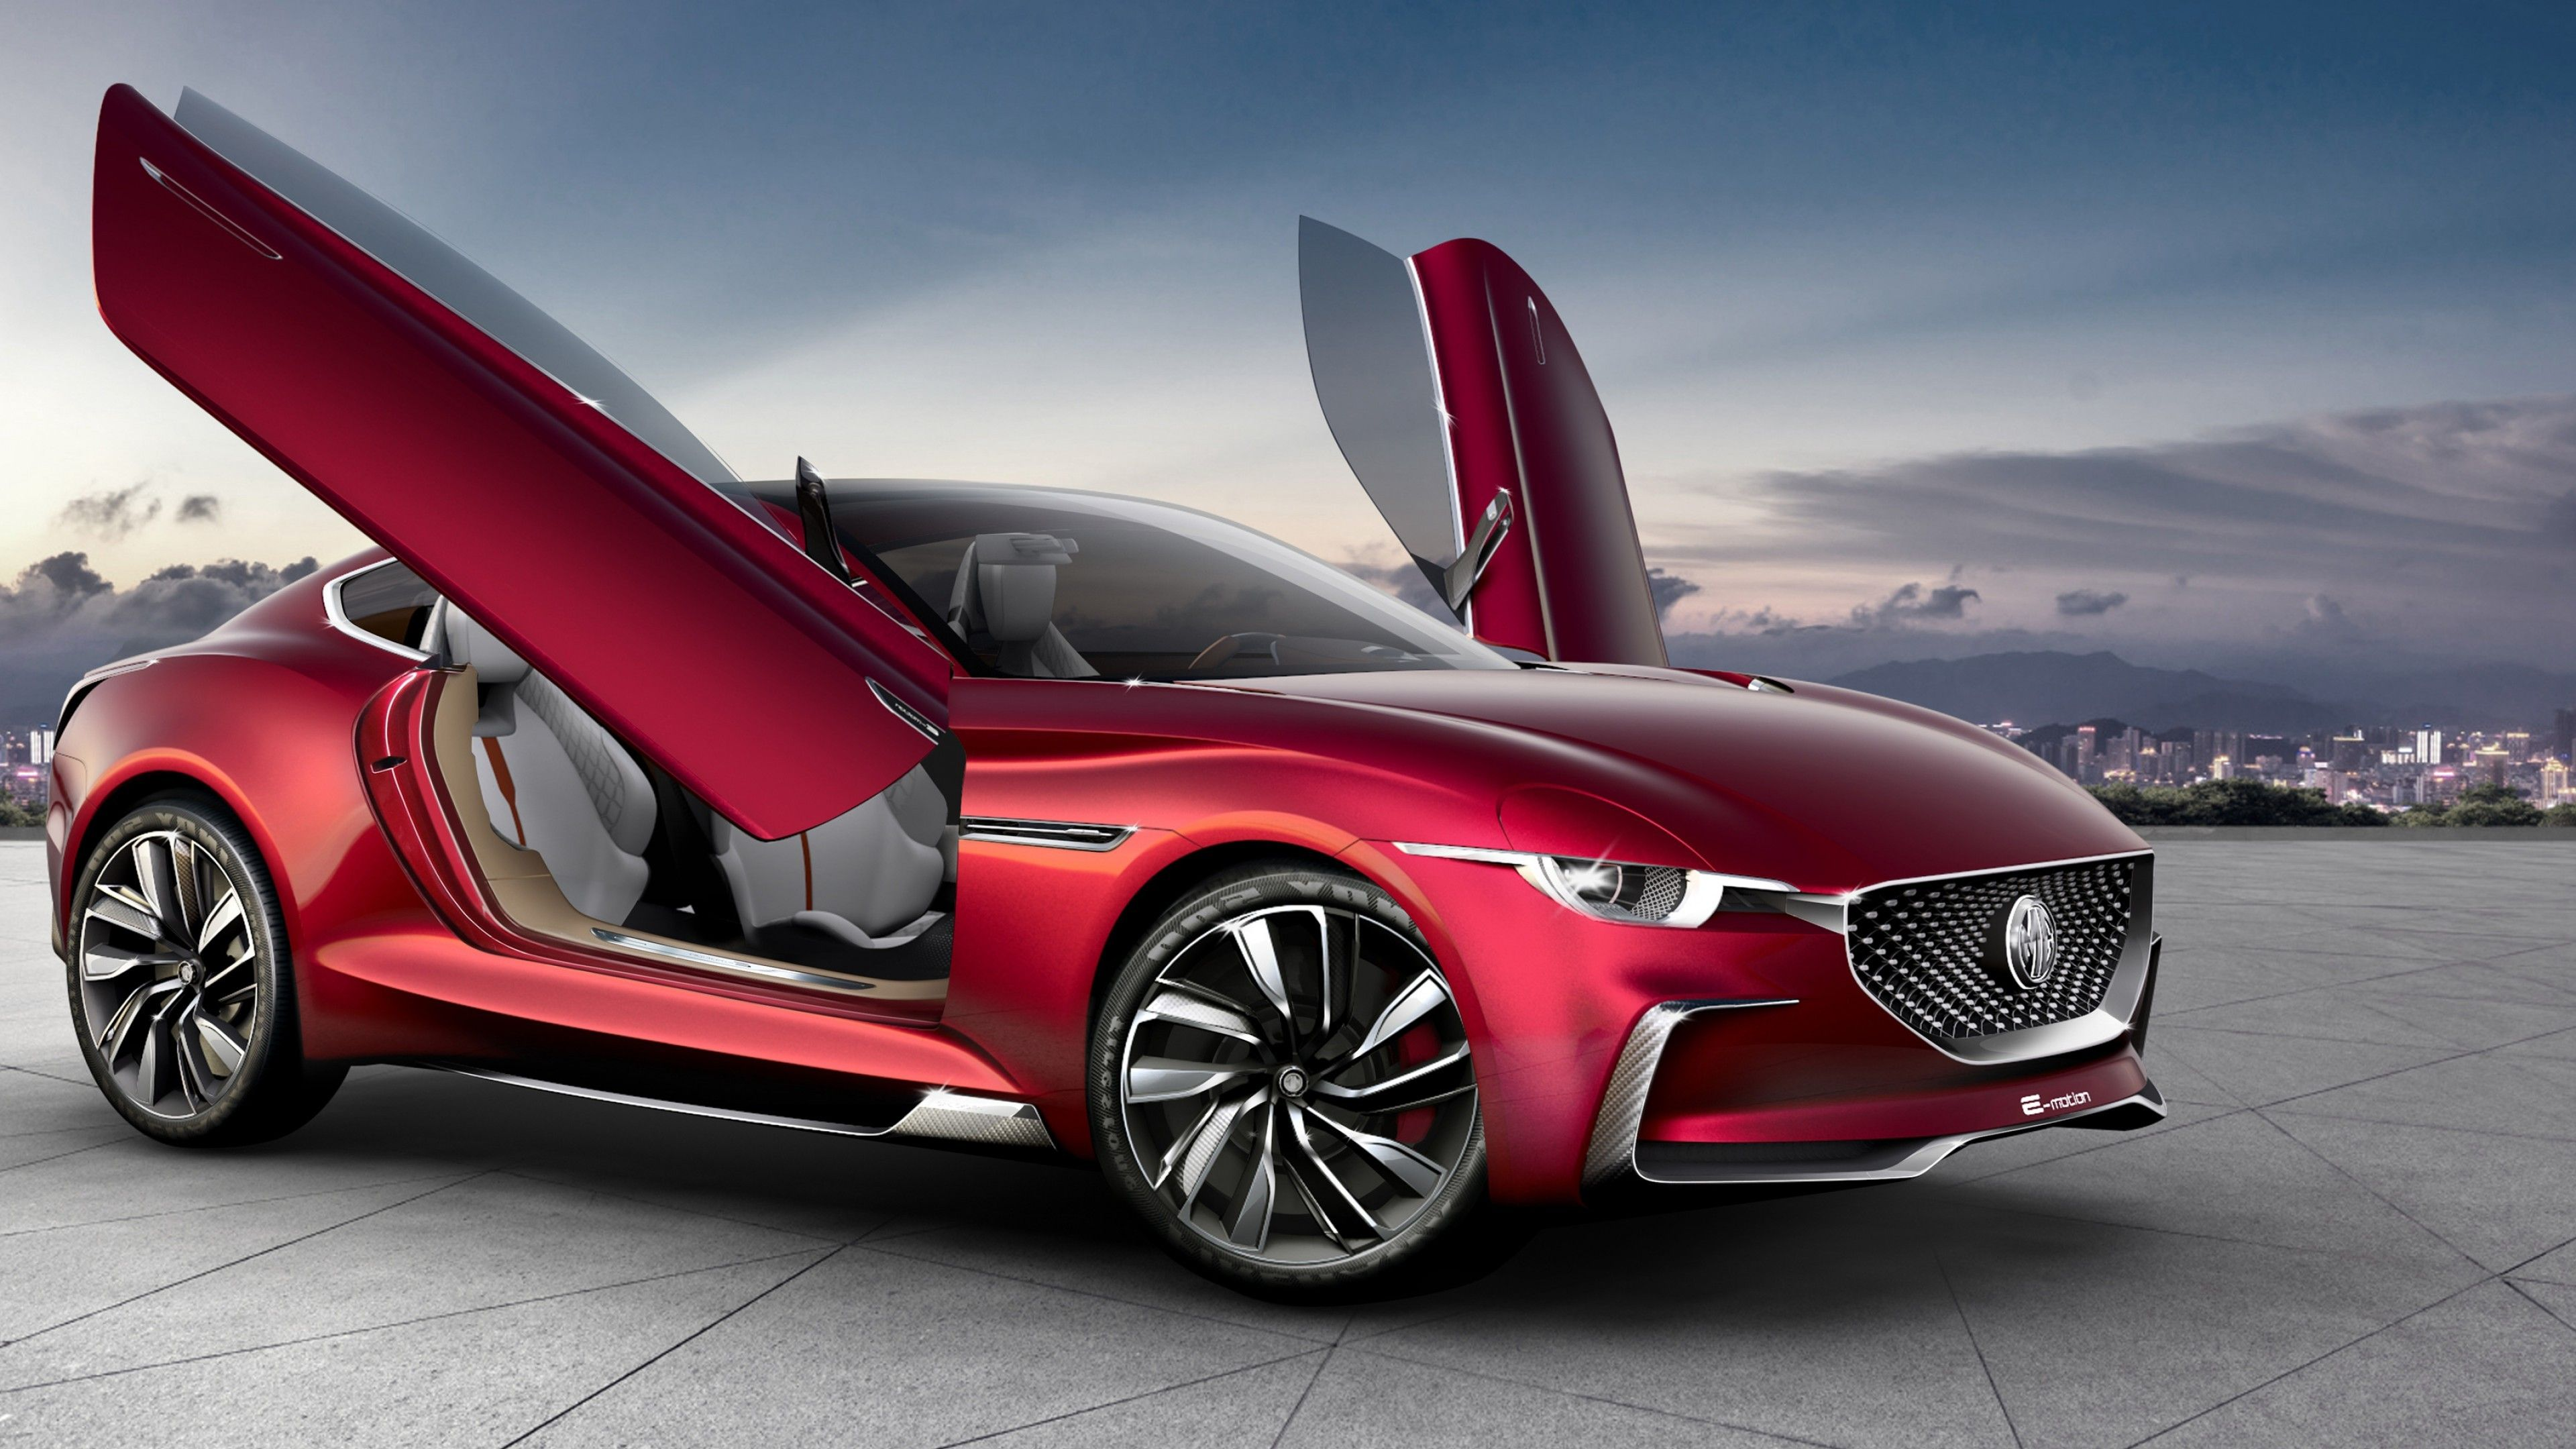

In [768]:
Image('https://i.pinimg.com/originals/8c/9b/90/8c9b9076cc04dac528de493cbefd3ae8.jpg')

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Fitting our data to train our <i> Model </i> </b> ###

In [769]:
# Fitting the model in Traing Data
car_model.fit(x_train, y_train) 

LinearRegression()

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Definig <i>M</i> and <i>C</i> of our <i> Model </i> </b> ###

In [770]:
m = car_model.coef_           
c = car_model.intercept_

In [771]:
# Printing m and c
print('\"M\" of the Model is : ', m)
print('\n')
print('\"C\" of the Model is : ', c)

"M" of the Model is :  [ 672.2705617  1595.61175485  863.97256197 -306.11482994 -205.74451789
 -490.58151797  186.78634008  168.68119371]


"C" of the Model is :  -47189.23858202105


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>4. Prdict Car <i> Price </i> using <u> Linear Regression </u> </b> ##

In [772]:
# Predicting Traning Data using our Linear Model 2
y_prediction_train = car_model.predict(x_train)

In [773]:
# Predicting Testing Data using our Linear Model 1
y_prediction_test = car_model.predict(x_test)

<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking <b> Mean Squared error </b> of our "Model" ###

In [774]:
print('Mean Squared error of our Traning Data : ', mean_squared_error(y_train, y_prediction_train))
print('Mean Squared error of our Testing Data : ', mean_squared_error(y_test, y_prediction_test))

Mean Squared error of our Traning Data :  11090297.841841565
Mean Squared error of our Testing Data :  11300031.472735481


<style>
h3{color: rgb(255, 153, 0)}
</style>
### Checking <b> Mean Absolute error </b> of our "Model" ###

In [775]:
print('Mean Absolute error of our Traning Data : ', mean_absolute_error(y_train, y_prediction_train))
print('Mean Absolute error of our Testing Data : ', mean_absolute_error(y_test, y_prediction_test))

Mean Absolute error of our Traning Data :  2506.0343592691197
Mean Absolute error of our Testing Data :  2583.4912514587977


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>5. Model Accurecy on Both Train and Test Data </b> ##

<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Training Accurecy <b> ###

In [776]:
train_accuracy = r2_score(y_train, y_prediction_train)
print(f'The model training is accurate of {train_accuracy*100:.2f}% .')

The model training is accurate of 91.79% .


<style>
h3{color: rgb(255, 153, 0)}
</style>
### <b> Testing Accurecy <b> ###

In [777]:
test_accuracy = r2_score(y_test, y_prediction_test)
print(f'The model testing is accurate of {test_accuracy*100:.2f}% .')

The model testing is accurate of 87.42% .


<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>6. Verifying Model Accurecy on Both Train and Test Data </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Training Data <i>"Actual"</i> vs <i>"Predicted"</i> and "Error" chart <b>  ###

In [778]:
# Creating Actual vs Predicted Data Frame 
car_mod_2_training_chart = pd.DataFrame({'Actual': y_train.astype('int'),
                                         'Predicted' : (y_prediction_train).astype('int'),
                                         'Error' : (y_train - y_prediction_train).astype('int')})

In [779]:
# 1st Five rows of Actual vs Predicted
car_mod_2_training_chart.head().style.background_gradient(cmap='Reds')

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Testing Data <i>"Actual"</i> vs <i>"Predicted"</i> and "Error" chart <b>  ###

In [780]:
# Creating Actual vs Predicted Data Frame 
car_mod_2_testing_chart = pd.DataFrame({'Actual': y_test.astype('int'),
                                        'Predicted' : (y_prediction_test).astype('int'),
                                        'Error' : (y_test - y_prediction_test).astype('int')})

In [781]:
# Rows of Actual vs Predicted
car_mod_2_testing_chart.style.background_gradient(cmap='Greens')

<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>7. Ploting various plot to Compare "Actual" vs "Predicted" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Train Accurecy Ploting <b> ###

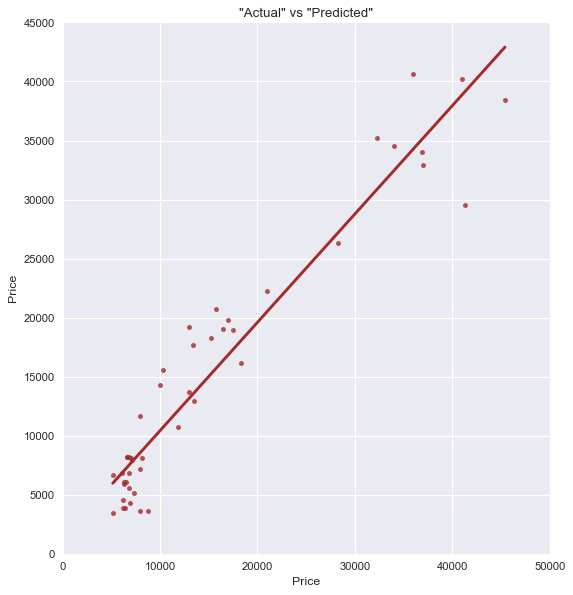

In [782]:
plt.figure(figsize=(7, 8))
plt.style.use('seaborn-v0_8')
sns.regplot(x=y_train, y=y_prediction_train, color='brown', marker='o', ci=None)
plt.title('\"Actual\" vs \"Predicted\"')
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Test Accurecy Ploting <b> ###

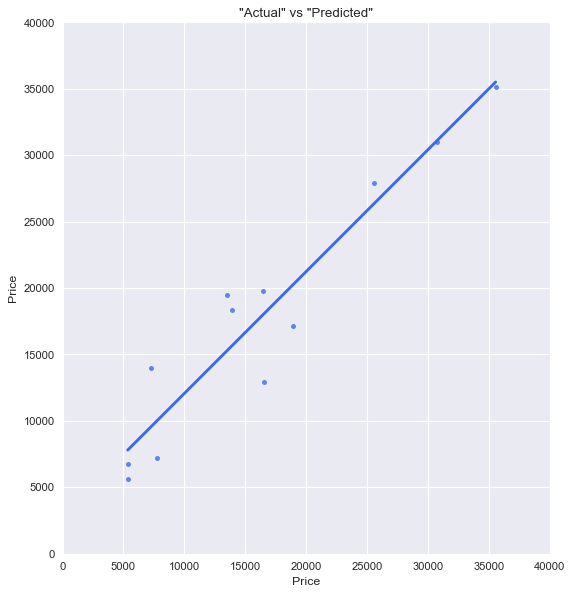

In [783]:
plt.figure(figsize=(7, 8))
plt.style.use('seaborn-v0_8')
sns.regplot(x=y_test, y=y_prediction_test, color='royalblue', marker='o', ci=None)
plt.title('\"Actual\" vs \"Predicted\"')
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Traing Data using <i>Scatterplot</i><b> ###

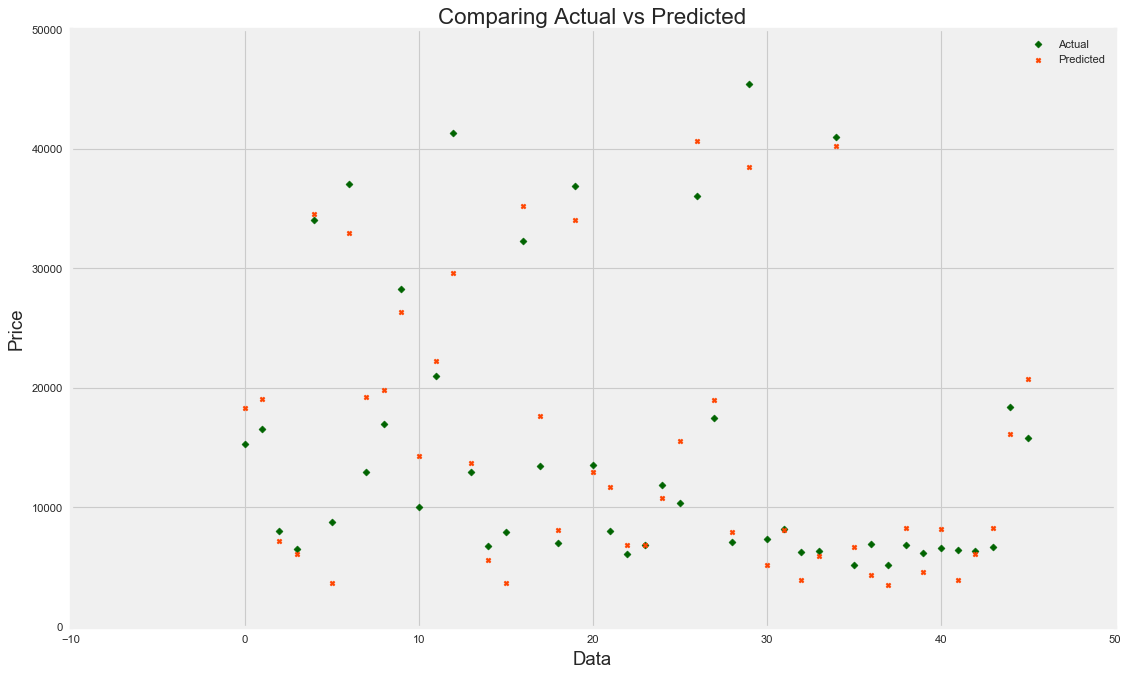

In [784]:
plt.figure(figsize=(15, 9))
plt.style.use("fivethirtyeight")
plt.scatter(x=range(46), y=y_train.iloc[:46], color='darkgreen', label='Actual', marker='D')
plt.scatter(x=range(46), y=y_prediction_train[:46], color='orangered', label='Predicted', marker='X')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Data')
plt.title('Comparing Actual vs Predicted')
plt.show()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Testing Data using <i>Scatterplot</i><b> ###

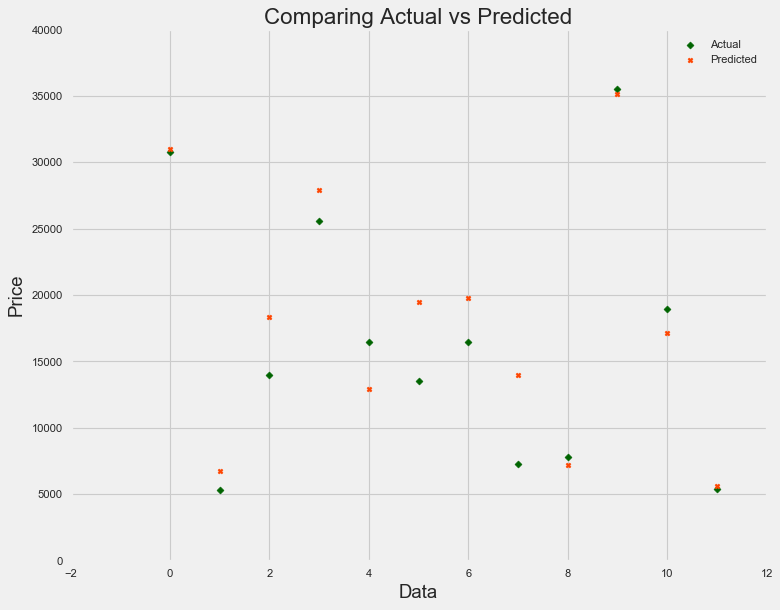

In [785]:
plt.figure(figsize=(10, 8))
plt.style.use("fivethirtyeight")
plt.scatter(x=range(12), y=y_test.iloc[:12], color='darkgreen', label='Actual', marker='D')
plt.scatter(x=range(12), y=y_prediction_test[:12], color='orangered', label='Predicted', marker='X')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Data')
plt.title('Comparing Actual vs Predicted')
plt.show()

<style>
h2{rgb(255, 255, 179); background-color: rgb(0, 153, 204);}
</style>
## <b>8. Visualize KDE plot to compare "Actual" vs "Predicted" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Training Data using <i>Kde</i><b> ###

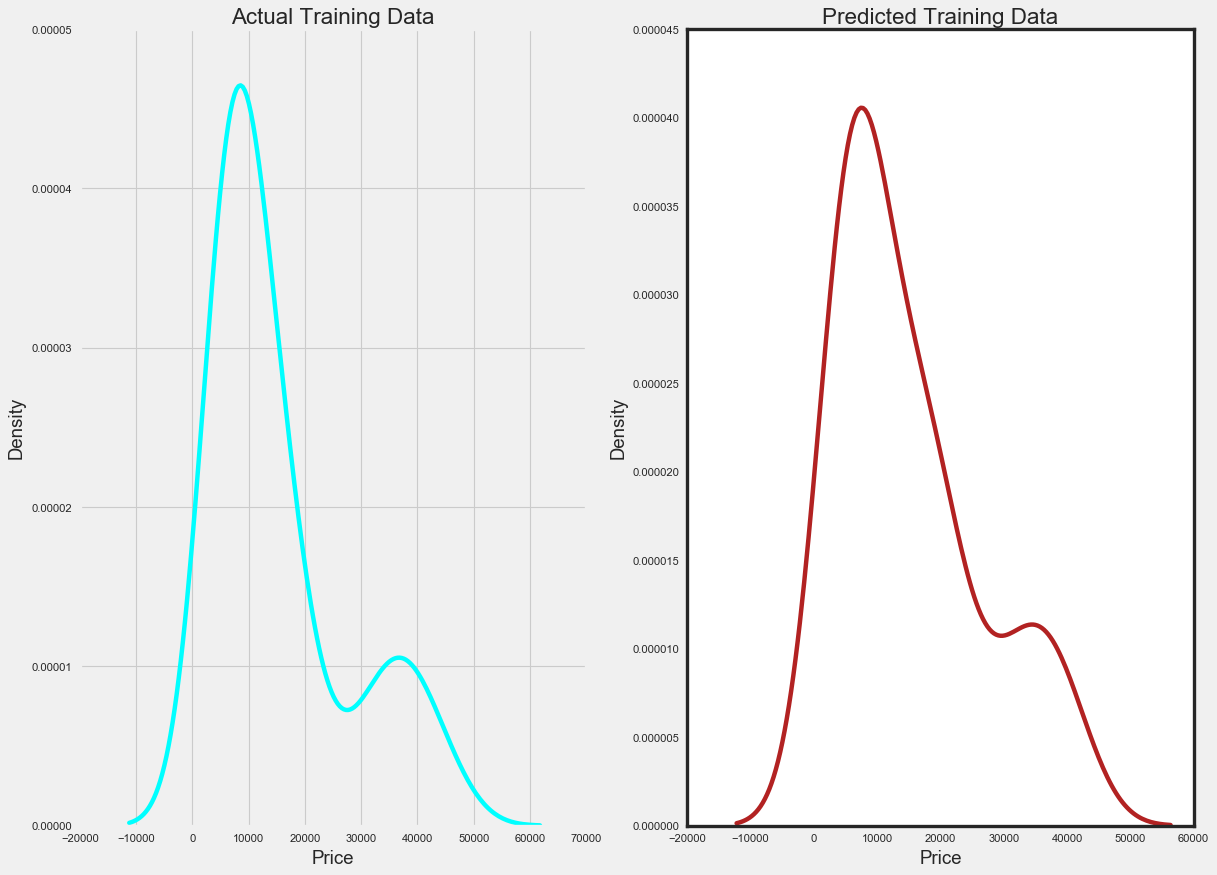

In [786]:
# Actual
plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
sns.set_style('ticks')
plt.title('Actual Training Data')
plt.xlabel('Price')
sns.kdeplot(y_train, color='aqua')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('ticks')
plt.title('Predicted Training Data')
plt.xlabel('Price')
sns.kdeplot(y_prediction_train, color='firebrick')
plt.show()

plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Compareing "Actucal" vs "Predicted" on Testing Data using <i>Kde</i><b> ###

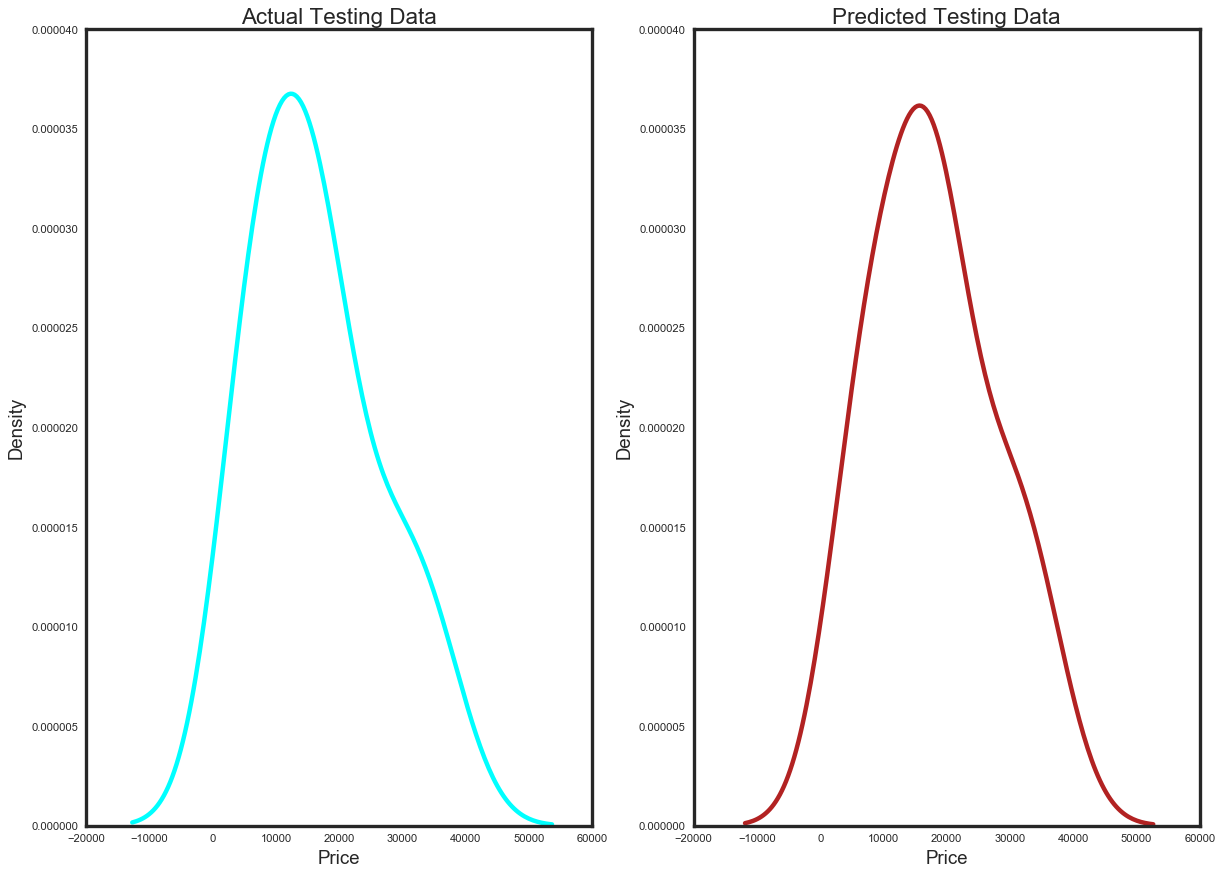

In [787]:
# Actual
plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
sns.set_style('ticks')
plt.title('Actual Testing Data')
plt.xlabel('Price')
sns.kdeplot(y_test, color='aqua')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('ticks')
plt.title('Predicted Testing Data')
plt.xlabel('Price')
sns.kdeplot(y_prediction_test, color='firebrick')
plt.show()

plt.close()

<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
<h1><b>4. Conclution of the Project on Model 2 </b></h1>

We achieved 91.79% accurecy on training and 87.42 % accurecy on testing in Model 2. We did not remove any column form our Model 2. All the charts has been displayed for a better visualiztion.

<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
<h1><b>5. Verdict of the Project work. </b></h1>

Hence we achieved 91.79% accurecy. With ploting predicted and actual using KDE and Scatterplot we can clearly say that Model 2 has far better than Model 1. Our model is almost close to our target variable. We used parameter tuning to achieve this amount of accurecy and that's work beautifully.

Project made by Ritam Karmakar. Submission Date 05.10.2023.